In [1]:
#Preamble
import tensorflow as tf
#enable Eager execution
tf.enable_eager_execution()

import numpy as np
import matplotlib.pyplot as plt
import TaylorFlow_190716 as tlf

def cmplxInnerProd(temp,data,psd,df):
    "computes complex inner product in the fourier domain IP = 4 deltaf sum((a * conguagte(b))/Weights)"
    
    temp_psd = tf.divide(temp,tf.sqrt(psd))
    data_psd = tf.divide(data,tf.sqrt(psd))
    
    return tf.multiply((4*df),tf.reduce_sum(tf.multiply(temp_psd,data_psd)))

def InnerProd(temp,data,psd,df):
    "computes inner product in the fourier domain IP = 4 deltaf RE sum((a * conguagte(b))/Weights)"
    
    return tf.real(cmplxInnerProd(temp,data,psd,df))

def sigsq(temp, psd, df):
    "computes sig^2 = (a|a), which can then be used to normalise function "
    temp_psd = tf.divide(temp,psd)
    
    return tf.real(tf.multiply(4*df,tf.reduce_sum(tf.multiply(temp_psd,temp_psd))))

def sig(temp, psd, df):
    "returns the sigma value of the signal"
    
    return tf.sqrt(sigsq(temp, psd, df))

def TensorNorm(a):
    "divides by max value of tensor to normalise between 0 and 1"
    
    # This function was included as multiplying the tensors without normalizing between zero and one
    # was setting all values to zero as they were so low.
    
    TensorMax = tf.reduce_max(tf.abs(a))
    Tmax_cmplx_recip = tf.complex(tf.reciprocal(TensorMax),0.)
    
    return tf.multiply(a,Tmax_cmplx_recip),TensorMax

def overlap(temp,data,psd,df):
    "Overlap equation"

    norm = tf.divide(1,tf.multiply(sig(temp,psd,df),sig(data,psd,df)))
    inner = InnerProd(temp,data,psd,df)
    overlap = tf.multiply(norm,inner)
        
    return overlap

def SNR(temp,data,psd,df):
    "Returns the SNR along with the normalization"
    norm = tf.reciprocal(sig(temp,psd,df))
    inner = InnerProd(temp,data,psd,df)
    
    return tf.multiply(norm,inner)

In [2]:
# set parameters for generating waveform
m1 = 1.4 
m2 = 1.4
m3 = 1.4
m4 = 1.4
df = 1./2048
f_low = 20.
f_high = 2000.

#produce waveforms
freq1, wvf1 = tlf.TaylorFlow(m1, m2, f_low=f_low, f_high=f_high, df = df, t_c=0., phi_c = 0)
freq2, wvf2 = tlf.TaylorFlow(m3, m4, f_low=f_low, f_high=f_high, df = df, t_c=0., phi_c = 0)

#normalize waveforms
wvfn1,max1 = TensorNorm(wvf1)
wvfn2 = tf.multiply(wvf2,tf.complex(tf.reciprocal(max1),0.))

#define psd for overlap
psd = tf.complex(np.ones(len(wvf1),dtype=np.float32),0.)

Instructions for updating:
Colocations handled automatically by placer.


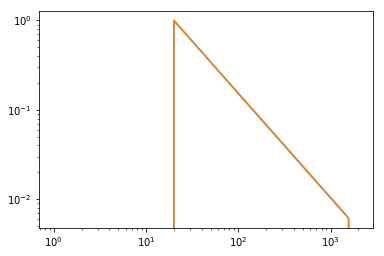

In [3]:
# plot waveforms for visulal comparison
plt.loglog(freq1.numpy(),abs(wvfn1))
plt.loglog(freq2.numpy(),abs(wvfn2))

In [4]:
# overlap function results
overlap = overlap(wvfn1,wvfn2,psd,df)
print(["overlap",overlap.numpy()])
SNR = SNR(wvfn1,wvfn2,psd,df)
print(["SNR",SNR.numpy()])
cmplxIP = cmplxInnerProd(wvfn1,wvfn2,psd,df)
print(["cmplxIP",cmplxIP.numpy()])
IP = InnerProd(wvfn1,wvfn2,psd,df)
print(["IP",IP.numpy()])
sig1 = sig(wvfn1,psd,df)
print(["sig1",sig1.numpy()])
sig2 = sig(wvfn2,psd,df)
print(["sig2",sig2.numpy()])
sigsq1= sigsq(wvfn1, psd, df)
print(["sigsq1",sigsq1.numpy()])
sigsq2= sigsq(wvfn2, psd, df)
print(["sigsq2",sigsq2.numpy()])

['overlap', 1.0]
['SNR', 7.734488]
['cmplxIP', (59.82231+0.0009052215j)]
['IP', 59.82231]
['sig1', 7.7344885]
['sig2', 7.7344885]
['sigsq1', 59.82231]
['sigsq2', 59.82231]
